In [20]:
from functions import *
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from time import time

In [21]:
def LSNS(data, distances, args=dict(running_time=10, local_search=True)):
    best_solution = (9999999999, None)
    order = random_initial_solution(data)
    order = local_search_steepest(order, distances, data)
    best_order = order
    start = time()
    count = 0
    while(args["running_time"] > time() - start):
        count += 1
        order = destroy(best_order,distances)
        order = repair(order, distances, data) #ten greedy cycle
        assert len(best_order) == len(order), f"Length of best_order is {len(best_order)} but length of order is {len(order)}"
        if args["local_search"]:
            order = local_search_steepest(order, distances, data)
        solution = calculate_value(data, distances, order)
        if solution[0] < best_solution[0]:
            best_solution = solution
            best_order = order
#         best_solution = min((best_solution, calculate_value(data, distances, order)), key = lambda t: t[0])
    return best_solution, count

In [22]:
def evaluate(func, data, n=20, args=None):
    print(func, args)
    distances = calculate_cost(data)
    total, worst_value, best_value, best_solution = 0, 0, float('inf'), None
    total_time, worst_time, best_time = 0,0,float('inf')
    total_iterations, most_iterations, least_iterations = 0,0,float('inf')
    for _ in tqdm(range(n)):
        start = time()
        (value, solution), iterations = func(data, distances, args)
        elapsed = time() - start
        total_time += elapsed
        if elapsed < best_time:
            best_time = elapsed
        worst_time = max(worst_time, elapsed)


        total += value
        if value < best_value:
            best_solution = solution
            best_value = value
        worst_value = max(worst_value, value)

        total_iterations += iterations
        least_iterations = min(least_iterations, iterations)
        most_iterations = max(most_iterations, iterations)

    return dict(average_score=total / n,
                worst_score=worst_value,
                best_score=best_value,
                solution=np.array(best_solution).T,
                average_time=total_time / n,
                worst_time= worst_time,
                best_time = best_time,
                average_iterations=total_iterations / n,
                most_iterations=most_iterations,
                least_iterations=least_iterations)

In [23]:
def summarize(func, data, title, args):
    evaluation_results = evaluate(func=func,
                                    data=data,
                                     n = 20,
                                     args = args)
    (x, y, z) = evaluation_results["solution"]
    print(f'{title}:')
    print(f'average time: {evaluation_results["average_time"]}\tworst time: {evaluation_results["worst_time"]}\tbest time: {evaluation_results["best_time"]}')
    print(f'average iterations: {evaluation_results["average_iterations"]}\tmost iterations: {evaluation_results["most_iterations"]}\tleast iterations: {evaluation_results["least_iterations"]}')
    print(f'average score: {evaluation_results["average_score"]}\tworst score: {evaluation_results["worst_score"]}\tbest score: {evaluation_results["best_score"]}')
    print('Best solution:')

    plt.figure(figsize=(15,10))
    plt.scatter(data[:,0], data[:,1], np.full(data[:,0].size, 100), data[:,2], cmap='gray_r')
    plt.clim(0, 1000)
    plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
    plt.plot(x, y, 'r')
    plt.xlim([-100, 4100])
    plt.ylim([-100, 2100])
    plt.title(title)
    plt.show()
    return evaluation_results

In [24]:
data = np.loadtxt('TSPC.csv', dtype=int, delimiter=';')

<function LSNS at 0x11f613ca0> {'running_time': 15.91, 'local_search': True}


  0%|          | 0/20 [00:00<?, ?it/s]

LSNS:
average time: 15.989339923858642	worst time: 16.0018789768219	best time: 15.977156162261963
average iterations: 2294.7	most iterations: 2684	least iterations: 1287
average score: 48363.4	worst score: 49234.0	best score: 47176.0
Best solution:


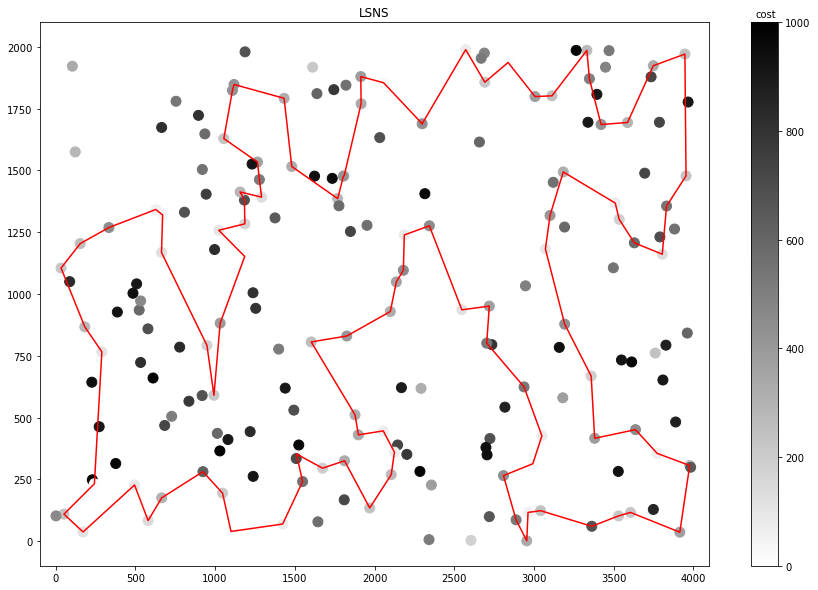

In [25]:
args = dict(running_time=15.91, local_search=True)
_ = summarize(LSNS, data, 'LSNS', args)

<function LSNS at 0x11f613ca0> {'running_time': 15.91, 'local_search': False}


  0%|          | 0/20 [00:00<?, ?it/s]

LSNS:
average time: 15.986128294467926	worst time: 15.99242901802063	best time: 15.97857403755188
average iterations: 3093.25	most iterations: 3631	least iterations: 1707
average score: 48907.5	worst score: 50073.0	best score: 47588.0
Best solution:


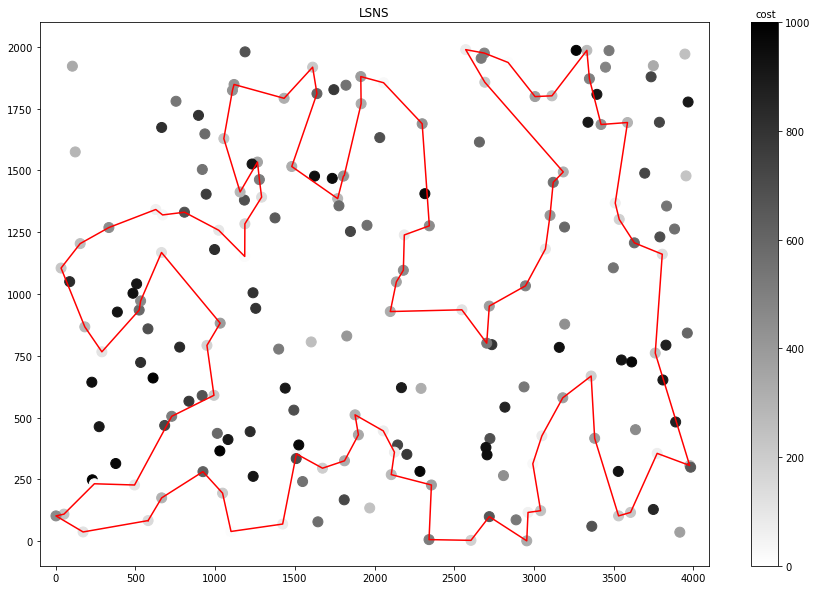

In [26]:
args = dict(running_time=15.91, local_search=False)
_ = summarize(LSNS, data, 'LSNS', args)

In [27]:
data = np.loadtxt('TSPD.csv', dtype=int, delimiter=';')

<function LSNS at 0x11f613ca0> {'running_time': 15.83, 'local_search': True}


  0%|          | 0/20 [00:00<?, ?it/s]

LSNS:
average time: 15.910057330131531	worst time: 15.933089017868042	best time: 15.900177240371704
average iterations: 2203.4	most iterations: 2656	least iterations: 1494
average score: 45231.3	worst score: 47024.0	best score: 43754.0
Best solution:


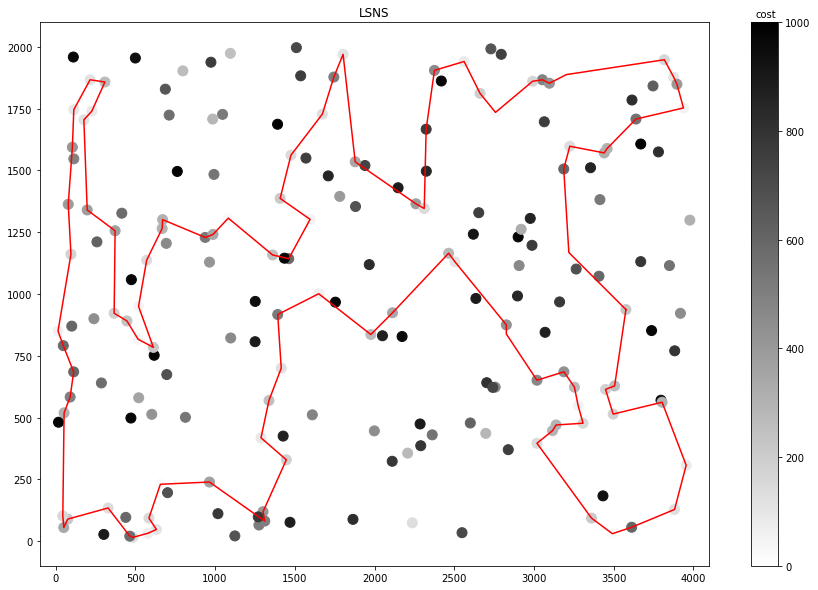

In [28]:
args = dict(running_time=15.83, local_search=True)
_ = summarize(LSNS, data, 'LSNS', args)

<function LSNS at 0x11f613ca0> {'running_time': 15.83, 'local_search': False}


  0%|          | 0/20 [00:00<?, ?it/s]

LSNS:
average time: 15.910175859928131	worst time: 15.918129920959473	best time: 15.90518307685852
average iterations: 2991.25	most iterations: 3680	least iterations: 1712
average score: 45551.55	worst score: 46909.0	best score: 44286.0
Best solution:


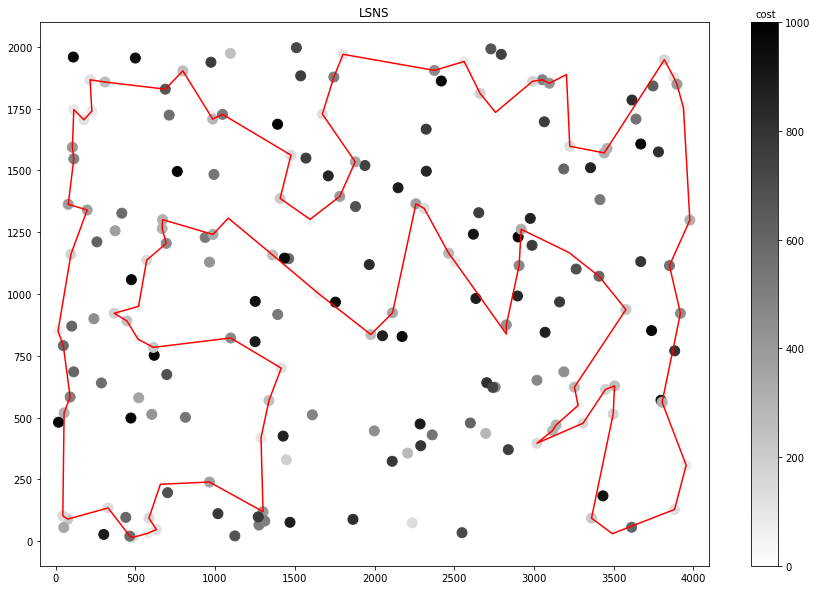

In [29]:
args = dict(running_time=15.83, local_search=False)
_ = summarize(LSNS, data, 'LSNS', args)